In [ ]:
! git clone https://github.com/Nelson-Gon/unet.git

In [22]:
%cd unet

/content/unet/unet


In [4]:
from unet.model import *
from unet.data import *
from unet.augmentation import *

Using TensorFlow backend.


In [10]:
!  ls examples/BBBC003_v1/

images	truth


In [6]:
data_generator_args =  dict(rotation_range=45,
                      rescale = 1./255,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')

In [36]:
!mkdir aug

In [40]:
train_generator = trainGenerator(5, "examples/BBBC003_v1","images", "truth",aug_dict = data_generator_args,
                                 seed = 3, target_size = (256, 256), save_to_dir="aug")

In [41]:
model = unet(input_size = (256, 256, 1), metrics=['accuracy'], loss='binary_crossentropy', learning_rate=1e-4)

In [42]:
history = model.fit_generator(train_generator,steps_per_epoch=30,epochs=5)

Epoch 1/5
Found 15 images belonging to 1 classes.
Found 15 images belonging to 1 classes.
30/30 [==============================] - 44s 1s/step - loss: 0.2709 - accuracy: 0.9106
Epoch 2/5
30/30 [==============================] - 38s 1s/step - loss: 0.1365 - accuracy: 0.9313
Epoch 3/5
30/30 [==============================] - 38s 1s/step - loss: 0.0932 - accuracy: 0.9580
Epoch 4/5
30/30 [==============================] - 38s 1s/step - loss: 0.0662 - accuracy: 0.9636
Epoch 5/5
30/30 [==============================] - 38s 1s/step - loss: 0.0707 - accuracy: 0.9592


In [ ]:
! mkdir aug/masks && mv aug/mask* aug/masks/

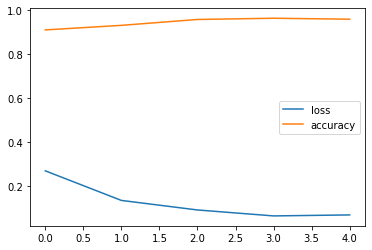

In [46]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.legend(['loss', 'accuracy'])

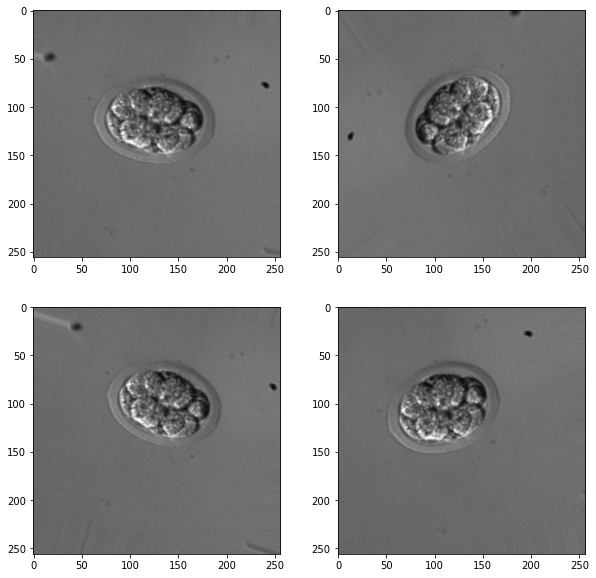

In [48]:
show_images("aug", image_suffix="png")

In [ ]:
! ls aug/*.png | wc -l

In [78]:
test_images = testGenerator("aug", 15, image_suffix="png")

In [79]:
model.save("unet_embryo.hdf5")

In [80]:
model = unet(pretrained_weights="unet_embryo.hdf5")

In [81]:
results = model.predict_generator(test_images, 15, verbose=1)

15/15 [==============================] - 2s 130ms/step


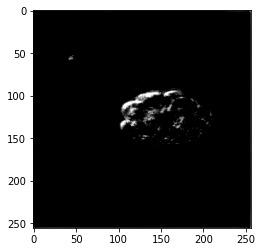

In [82]:
plt.imshow(results[12][:,:,0], cmap="gray")

In [83]:
! mkdir predictions

In [85]:
savePredictions("predictions", results, image_prefix="image")

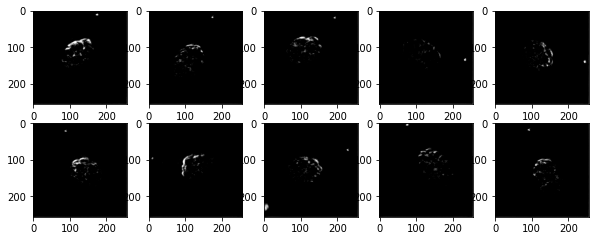

In [88]:
show_images("predictions", image_suffix="tif", number = 10)